In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
# Load the Excel workbook 
xls = pd.ExcelFile('PremierLeague 2324.xlsx')

In [24]:
# Load all relevant sheets individually again
league_table = pd.read_excel(xls, sheet_name='League Table')
standard_stats = pd.read_excel(xls, sheet_name='Standard Stats')
playing_time = pd.read_excel(xls, sheet_name='Playing Time')
shooting = pd.read_excel(xls, sheet_name='Shooting')
passing = pd.read_excel(xls, sheet_name='Passing')
pass_types = pd.read_excel(xls, sheet_name='Pass Types')
goal_shot_creation = pd.read_excel(xls, sheet_name='Goal & Shot Creation')
defensive_actions = pd.read_excel(xls, sheet_name='Defensive Actions')
possession = pd.read_excel(xls, sheet_name='Possession')
goalkeeping = pd.read_excel(xls, sheet_name='Goalkeeping')
advanced_goalkeeping = pd.read_excel(xls, sheet_name='Advanced Goalkeeping')
miscellaneous = pd.read_excel(xls, sheet_name='Miscellaneous')

# Verify data load (preview League Table as a quick check)
league_table.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Manchester City,38,28,7,3,96,34,62,91,2.39,80.5,35.6,44.9,1.18,53012,Erling Haaland - 27,Ederson,→ Champions League via league finish
1,2,Arsenal,38,28,5,5,91,29,62,89,2.34,76.1,27.9,48.2,1.27,60236,Bukayo Saka - 16,David Raya,→ Champions League via league finish
2,3,Liverpool,38,24,10,4,86,41,45,82,2.16,87.8,45.7,42.0,1.11,55979,Mohamed Salah - 18,Alisson,→ Champions League via league finish
3,4,Aston Villa,38,20,8,10,76,61,15,68,1.79,63.3,59.9,3.4,0.09,41858,Ollie Watkins - 19,Emiliano Martínez,→ Champions League via league finish
4,5,Tottenham,38,20,6,12,74,61,13,66,1.74,68.2,63.4,4.8,0.13,61482,Son Heung-min - 17,Guglielmo Vicario,→ Europa League via league finish


In [25]:
# Merge sheets for General Team Performance clearly
general_performance_df = league_table[['Squad', 'Rk']].merge(
    standard_stats, on='Squad').merge(
    playing_time, on='Squad', suffixes=('_std', '_play'))

# Selecting numeric columns for correlation analysis
general_numeric_df = general_performance_df.select_dtypes(include=[np.number])

# Exclude direct scoring, goal, win-loss, and points metrics clearly
exclude_cols = [
    'Rk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'xG', 'xGA', 'xGD',
    'Gls', 'Ast', 'G+A', 'G-PK', 'G+A-PK', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG',
    'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1',
    'onG', 'onGA', '+/-', '+/-90', 'onxG', 'onxGA', 'xG+/-', 'xG+/-90', 'PPM'
]

# Remaining metrics for correlation
general_numeric_filtered = general_numeric_df.drop(columns=exclude_cols, errors='ignore')

# Calculate correlations clearly against rank (Rk)
general_corr_rank = general_numeric_filtered.corrwith(general_numeric_df['Rk']).sort_values()

# Display top 10 correlations clearly
general_corr_rank.head(10)

PrgP       -0.841760
Poss       -0.795993
PrgC       -0.741427
PKatt      -0.634555
PK         -0.586579
Mn/Start   -0.358569
Compl      -0.197932
unSub      -0.178388
Age_std     0.020383
Age_play    0.020383
dtype: float64

In [26]:
# Merge sheets for Offensive Stats clearly
offensive_df = league_table[['Squad', 'Rk']].merge(
    shooting, on='Squad').merge(
    passing, on='Squad', suffixes=('_shoot', '_pass')).merge(
    pass_types, on='Squad', suffixes=('', '_type')).merge(
    goal_shot_creation, on='Squad', suffixes=('', '_gsc'))

# Selecting numeric columns for correlation analysis
offensive_numeric_df = offensive_df.select_dtypes(include=[np.number])

# Explicitly exclude direct goal-related, points, and win-loss metrics clearly
exclude_offensive_cols = [
    'Rk', 'Gls', 'Sh', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'Dist', 'FK',
    'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG',
    'Gls_pass', 'Ast', 'xAG', 'xA', 'A-xAG', 'KP',
    'SCA', 'SCA90', 'GCA', 'GCA90', 'Gls_gsc'
]

# Remaining metrics for correlation
offensive_numeric_filtered = offensive_numeric_df.drop(columns=exclude_offensive_cols, errors='ignore')

# Calculate correlations clearly against league rank (Rk)
offensive_corr_rank = offensive_numeric_filtered.corrwith(offensive_numeric_df['Rk']).sort_values()

# Display top 10 correlations clearly
offensive_corr_rank.head(10)


PassLive.1            -0.891909
SoT/90                -0.863377
TB                    -0.847760
PrgP                  -0.841760
2025-01-03 00:00:00   -0.838736
PassLive              -0.837940
PPA                   -0.830386
Sh/90                 -0.811371
Cmp%                  -0.809617
Cmp%.2                -0.804457
dtype: float64

In [27]:
# Merge sheets for Defensive Stats (Defensive Actions, Possession)
defensive_df = league_table[['Squad', 'Rk']].merge(
    defensive_actions, on='Squad').merge(
    possession, on='Squad', suffixes=('_def', '_poss'))

# Selecting numeric columns for correlation analysis
defensive_numeric_df = defensive_df.select_dtypes(include=[np.number])

# Explicitly exclude direct goal-related, win-loss, and points metrics
exclude_defensive_cols = [
    'Rk', 'Tkl%', 'Err', 'Int', 'Tkl+Int', 'Clr', 'Blocks',
    'Poss', 'TklW', 'Tkl', 'PrgC', 'PrgP', 'Carries', 'Won%', 'PrgDist'
]

# Remaining metrics for correlation (keeping indirectly relevant stats like position-based metrics)
defensive_numeric_filtered = defensive_numeric_df.drop(columns=exclude_defensive_cols, errors='ignore')

# Calculate correlations clearly against league rank (Rk)
defensive_corr_rank = defensive_numeric_filtered.corrwith(defensive_numeric_df['Rk']).sort_values()

# Display top 10 correlations clearly
defensive_corr_rank.head(10)


PrgR                  -0.841354
Att Pen               -0.828420
Att 3rd_poss          -0.798589
TotDist               -0.785921
CPA                   -0.776912
Rec                   -0.776852
Mid 3rd_poss          -0.766027
Touches               -0.766007
Live                  -0.765845
2025-01-03 00:00:00   -0.718176
dtype: float64

In [28]:
# Merge sheets for Goalkeeping Stats clearly
goalkeeping_df = league_table[['Squad', 'Rk']].merge(
    goalkeeping, on='Squad').merge(
    advanced_goalkeeping, on='Squad', suffixes=('_gk', '_adv_gk'))

# Selecting numeric columns for correlation analysis
goalkeeping_numeric_df = goalkeeping_df.select_dtypes(include=[np.number])

# Explicitly exclude direct goal-related, wins, clean sheets, and points metrics clearly
exclude_goalkeeping_cols = [
    'Rk', 'MP', 'Starts', 'Min', '90s', 'GA', 'GA90', 'SoTA', 'Saves', 
    'CS', 'CS%', 'PKatt', 'PKA', 'PKsv', 'Save%', 'W', 'D', 'L',
    'PSxG', 'PSxG/SoT', 'PSxG+/-', '/90', 'Cmp', 'Att', 'Cmp%', 'Att_gk', 
    'Thr', 'Launch%', 'AvgLen', 'Att.1', 'Launch%.1', 'AvgLen.1', 'Opp', 'Stp', 'Stp%', '#OPA', '#OPA/90', 'AvgDist'
]

# Remaining metrics for correlation (if any indirectly relevant remain)
goalkeeping_numeric_filtered = goalkeeping_numeric_df.drop(columns=exclude_goalkeeping_cols, errors='ignore')

# Check if there are any remaining metrics to analyze
goalkeeping_corr_rank = goalkeeping_numeric_filtered.corrwith(goalkeeping_numeric_df['Rk']).sort_values()

# Display available correlations if any remain
goalkeeping_corr_rank.head(10)


Save%.1       -0.421906
FK            -0.139740
Att (GK)      -0.005647
# Pl_gk        0.068551
# Pl_adv_gk    0.068551
PKm            0.263604
OG             0.339545
PKA_gk         0.386123
PKA_adv_gk     0.386123
CK             0.507017
dtype: float64

In [29]:
# Merge sheet for Miscellaneous Stats clearly
misc_df = league_table[['Squad', 'Rk']].merge(miscellaneous, on='Squad')

# Selecting numeric columns for correlation analysis
misc_numeric_df = misc_df.select_dtypes(include=[np.number])

# Explicitly exclude direct goal-related, wins, points, and other explicitly outcome-related metrics
exclude_misc_cols = [
    'Rk', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'PKwon', 'PKcon', 'OG'
]

# Remaining metrics for correlation (focusing on indirect influence)
misc_numeric_filtered = misc_numeric_df.drop(columns=exclude_misc_cols, errors='ignore')

# Calculate correlations clearly against league rank (Rk)
misc_corr_rank = misc_numeric_filtered.corrwith(misc_numeric_df['Rk']).sort_values()

# Display top correlations clearly
misc_corr_rank.head(10)


Fld     -0.429072
Won%    -0.413510
Crs     -0.249046
Recov   -0.026674
Off     -0.023029
# Pl     0.261851
TklW     0.264733
Int      0.497905
Won      0.646468
Lost     0.791660
dtype: float64

In [30]:
# Final corrected merge using Save% instead of CK clearly
model_df_finalized = league_table[['Squad', 'Rk']].merge(
    standard_stats[['Squad', 'PrgP', 'Poss']], on='Squad').merge(
    possession[['Squad', 'PrgC', 'PrgR', 'Att Pen', 'Att 3rd']], on='Squad').merge(
    passing[['Squad', 'KP', 'Ast']], on='Squad').merge(
    goal_shot_creation[['Squad', 'PassLive.1']], on='Squad').merge(
    pass_types[['Squad', 'TB', 'Crs']], on='Squad').merge(
    advanced_goalkeeping[['Squad', 'PSxG+/-']], on='Squad').merge(
    goalkeeping[['Squad', 'Save%']], on='Squad').merge(
    miscellaneous[['Squad', 'Fld', 'Won%', 'Lost']], on='Squad')

# Define X and y for modeling clearly
X = model_df_finalized.drop(columns=['Squad', 'Rk'])
y = model_df_finalized['Rk']

# Split dataset into training and testing clearly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the Random Forest model
final_rf_model_finalized = RandomForestRegressor(n_estimators=100, random_state=42)
final_rf_model_finalized.fit(X_train, y_train)

# Predict and evaluate the finalized model
final_predictions_finalized = final_rf_model_finalized.predict(X_test)
final_mae_finalized = mean_absolute_error(y_test, final_predictions_finalized)
final_rmse_finalized = mean_squared_error(y_test, final_predictions_finalized, squared=False)

# Display finalized evaluation metrics
final_mae_finalized, final_rmse_finalized


(3.8980000000000006, 3.9964309076975173)

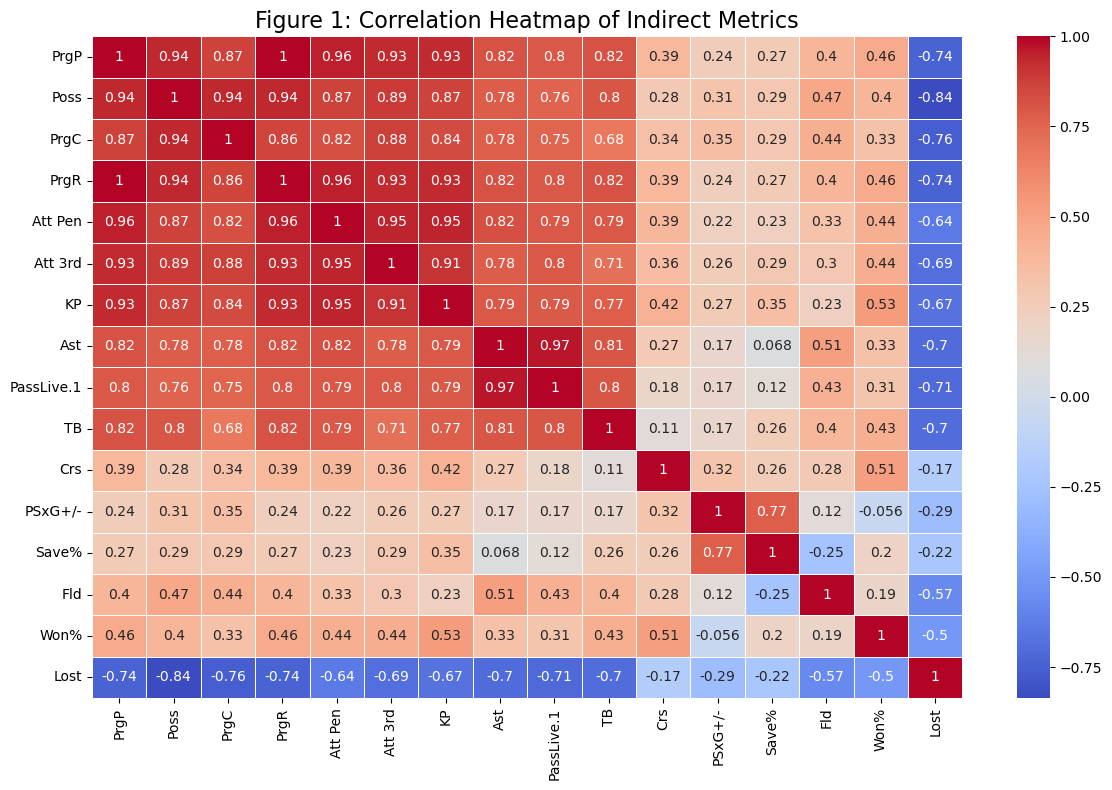

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'X' is your final dataset of indirect metrics
corr_matrix = X.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Figure 1: Correlation Heatmap of Indirect Metrics", fontsize=16)
plt.tight_layout()
plt.show()

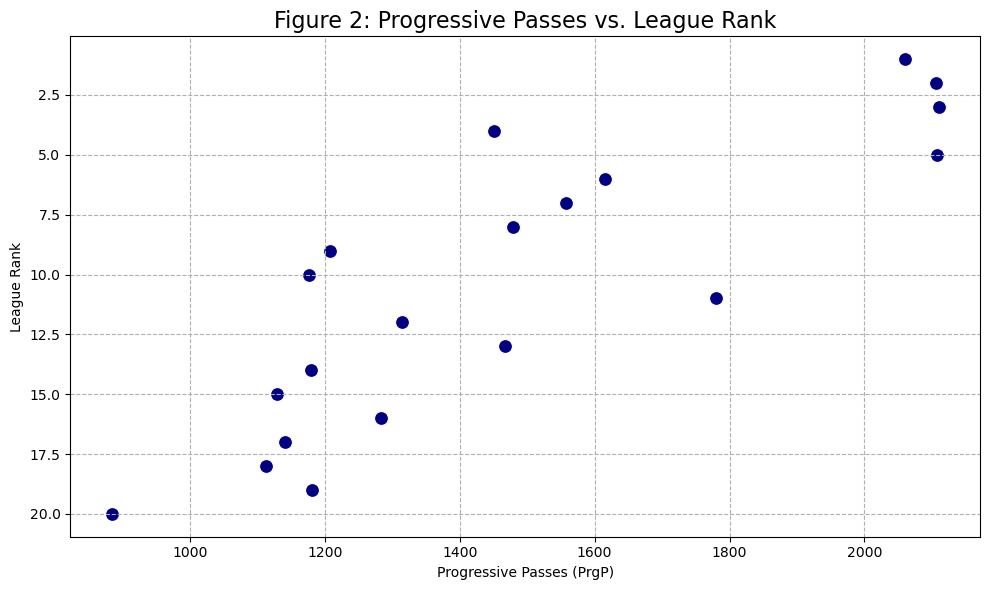

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PrgP', y=y, data=X, s=100, color='navy')
plt.xlabel("Progressive Passes (PrgP)")
plt.ylabel("League Rank")
plt.title("Figure 2: Progressive Passes vs. League Rank", fontsize=16)
plt.gca().invert_yaxis()  # Invert rank (best at top)
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()


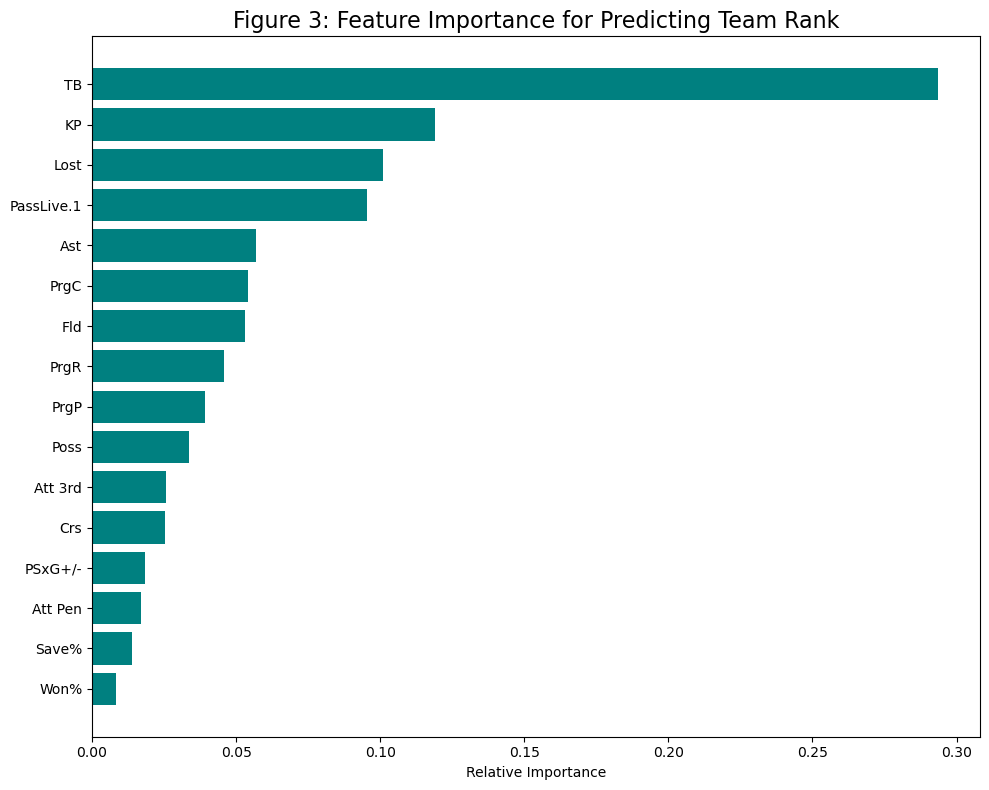

In [34]:
import numpy as np

feature_importances = final_rf_model_finalized.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), feature_importances[indices], color='teal')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.title("Figure 3: Feature Importance for Predicting Team Rank", fontsize=16)
plt.tight_layout()
plt.show()


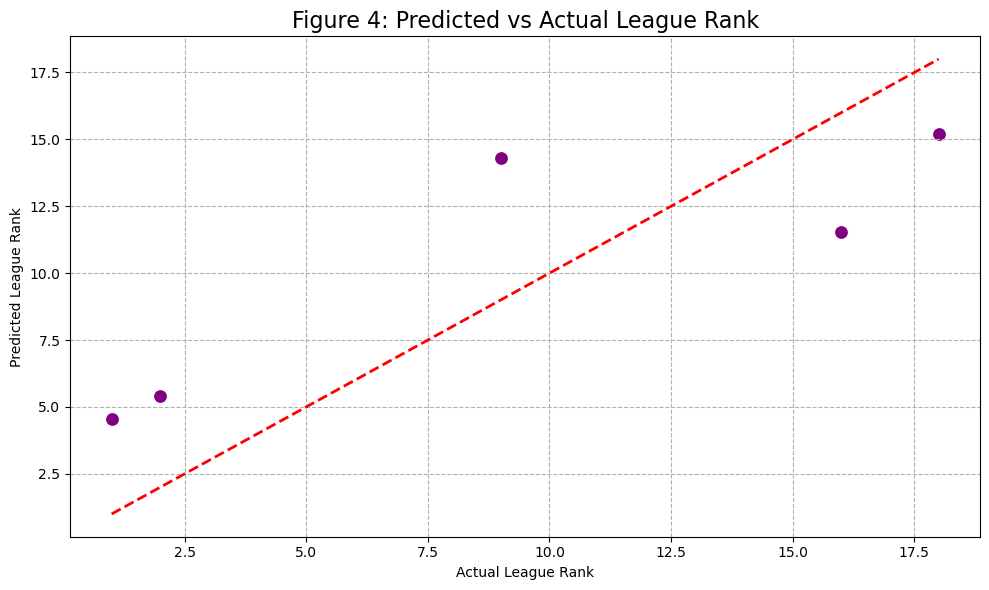

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=final_predictions_finalized, s=100, color='purple')
plt.xlabel("Actual League Rank")
plt.ylabel("Predicted League Rank")
plt.title("Figure 4: Predicted vs Actual League Rank", fontsize=16)

plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         linestyle='--', color='red', linewidth=2)

plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()


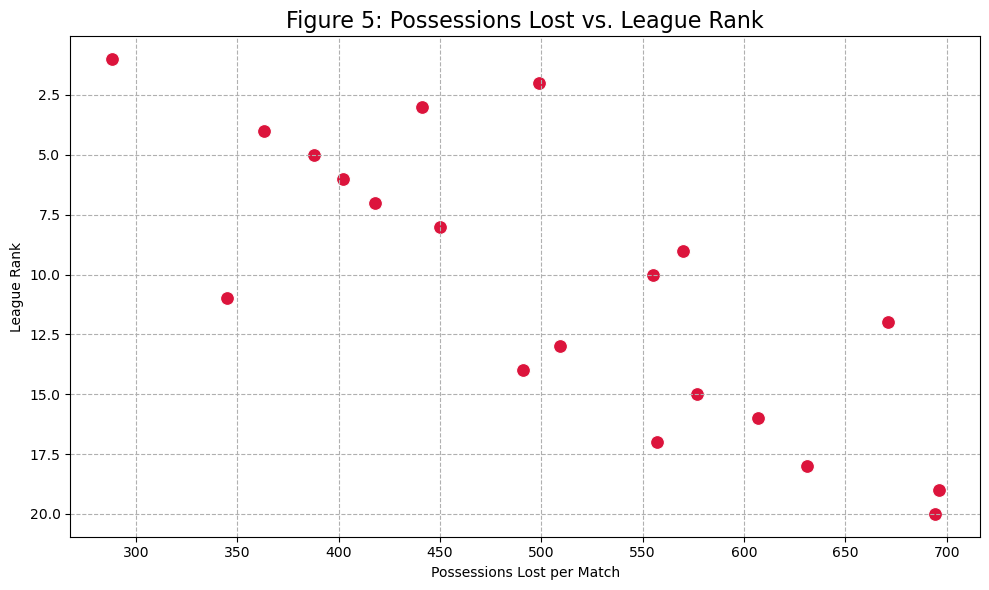

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Lost', y=y, data=X, s=100, color='crimson')
plt.xlabel("Possessions Lost per Match")
plt.ylabel("League Rank")
plt.title("Figure 5: Possessions Lost vs. League Rank", fontsize=16)
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()
